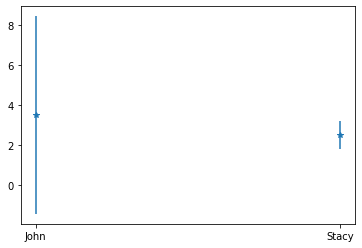

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Stuff for Jess
#Make a fake data frame to work with
df = {
    'name': ["John", "Stacy", "John", "Stacy", "Jack", "Jack"], 
    'error': [0, 3, 4, 2, 1, 3]
}
#Convert to panda frame
dataErrors = pd.DataFrame(df)
#split data into mean and std column
meanColumn = dataErrors.groupby(['name']).mean().reset_index()
stdColumn = dataErrors.groupby(['name']).std().reset_index()
frames = [meanColumn, stdColumn]
pd.concat(frames)
#Merge back together and rename
finalFrame = pd.merge(meanColumn, stdColumn, on='name')
finalFrame = finalFrame.rename(columns={"error_x": "mean", "error_y": "std"})

x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

finalFrame
plt.errorbar(finalFrame.loc[:,'name'], finalFrame.loc[:,'mean'], finalFrame.loc[:,'std'], linestyle='None', marker='*')

plt.show()